# Random Forest
### Fetching the data

In [9]:
import pandas as pd

data_train = pd.read_csv("data/landsat_train.csv", header=None).to_numpy()
data_validation = pd.read_csv("data/landsat_validation.csv", header=None).to_numpy()
X_area = pd.read_csv("data/landsat_area.csv", header=None).to_numpy()


In [14]:

X_train, y_train = data_train[:,1:], data_train[:,0]
X_validation, y_validation = data_validation[:,1:], data_validation[:,0]


((5000000, 9), (1335558, 9))

In [18]:
print(f"Area data shape: {X_area.shape}")
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_validation.shape}")

Area data shape: (9000000, 9)
Training data shape: (5000000, 9)
Validation data shape: (1335558, 9)


### Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=10, 
    criterion='gini', 
    max_depth=None,
    max_features=None, 
    bootstrap=True, 
    random_state=42)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_features=None, n_estimators=10, random_state=42)

##### Validation accuracy

In [25]:
validation_accuracy = rf_clf.score(X_validation, y_validation)

print(f"Validation accuracy: {validation_accuracy:f}")

Validation accuracy: 0.751344


### Area prediction

In [27]:
y_area_pred = rf_clf.predict(X_area)

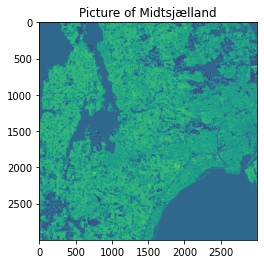

In [58]:
import matplotlib.pyplot as plt

plt.imshow(y_area_pred.reshape(3000,3000))
plt.title("Picture of Midtsjælland")
plt.show()